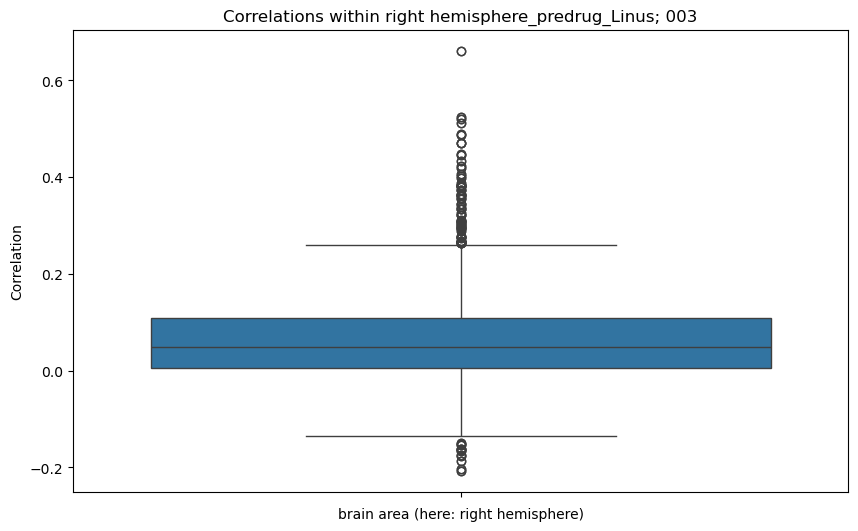

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("diagrams/boxplot", exist_ok=True)

file_predrug = 'correlation_files/csv_tables/correlation_matrix_long_format_predrug_003.csv'
file_postdrug = 'correlation_files/csv_tables/correlation_matrix_long_format_postdrug_003.csv'

# Please insert which hemisphere you are analysing
hemisphere = 'right'

# Please insert which session you want to analyse
session = 'predrug'

#Please insert with which file you are working from run_30 (prefix number)
prefix_number = '003'

#Please insert with which subject data you are working
subject = 'Linus'

file = file_predrug if session == 'predrug' else file_postdrug
df = pd.read_csv(file)

prefix = 'CR' if hemisphere == 'right' else 'CL'

    # Filter file with preconditions
df_long_filtered = df[(df['Variable1'].str.startswith(prefix)) &
                      (df['Variable2'].str.startswith(prefix)) &
                      (df['Correlation'] != 1)]
#print(df_long_filtered)

    # Generate violin diagram
plt.figure(figsize=(10,6))
sns.boxplot(data= df_long_filtered, y='Correlation')

    # Further modifications on diagram
plt.title(f'Correlations within {hemisphere} hemisphere_{session}_{subject}; {prefix_number}')
plt.xlabel(f'brain area (here: {hemisphere} hemisphere)')
plt.ylabel('Correlation')
plt.savefig(f"diagrams/boxplot/Correlation within {hemisphere} hemisphere_{session}_{subject}_{prefix_number}", dpi=300, bbox_inches='tight')
plt.show()


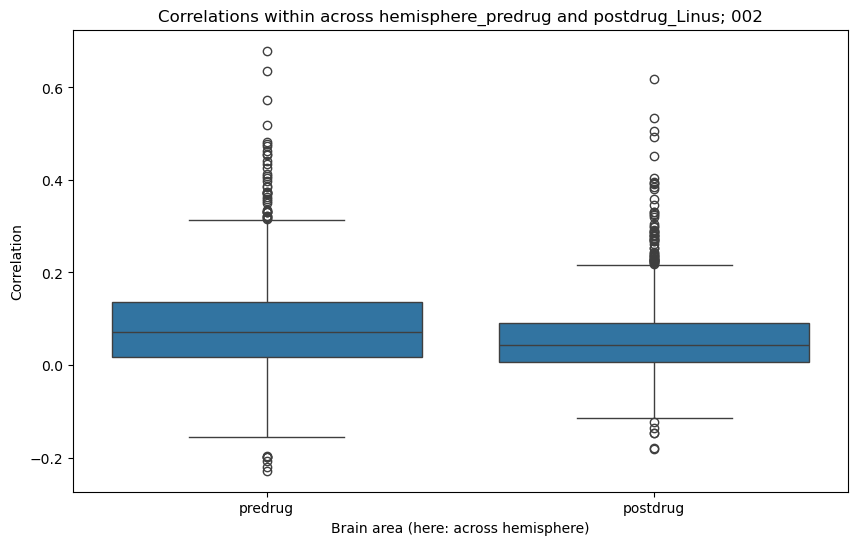

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("diagrams/boxplot", exist_ok=True)

# Please insert which hemisphere and session you are analyzing
hemisphere = 'across'  # Change to 'left', 'right', or 'both' as needed

# Please insert with which file you are working from run_30 (prefix number)
prefix_number = '002'

# Please insert with which subject data you are working
subject = 'Linus'
session = 'predrug and postdrug'  

# Load both CSV files
df_predrug = pd.read_csv('correlation_files/csv_tables/predrug_sub-Linus_epi_CHARM_in_NMT_v2.1_sym_05mm_002.csv')
df_postdrug = pd.read_csv('correlation_files/csv_tables/postdrug_sub-Linus_epi_CHARM_in_NMT_v2.1_sym_05mm_002.csv')

# Add a condition column to each DataFrame
df_predrug['Condition'] = 'predrug'
df_postdrug['Condition'] = 'postdrug'

# Combine both DataFrames
df_combined = pd.concat([df_predrug, df_postdrug], ignore_index=True)

# Define filter prefix based on hemisphere
if hemisphere == 'across':
    prefix1 = 'CR_'
    prefix2 = 'CL_'
else:
    prefix1 = 'CR_' if hemisphere == 'right' else 'CL_'
    prefix2 = prefix1  # For single hemisphere, both variables will have the same prefix

# Apply filtering conditions for both variables
df_combined_filtered = df_combined[(df_combined['Variable1'].str.startswith(prefix1)) &
                                   (df_combined['Variable2'].str.startswith(prefix2)) & 
                                   (df_combined['Correlation'] != 1)
]

# Generate violin diagram
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined_filtered, x="Condition", y="Correlation")

# Customize diagram
plt.title(f'Correlations within {hemisphere} hemisphere_{session}_{subject}; {prefix_number}')
plt.xlabel(f'Brain area (here: {hemisphere} hemisphere)')
plt.ylabel('Correlation')
plt.savefig(f"diagrams/boxplot/new/Correlation_within_{hemisphere}_hemisphere_{session}_{subject}_{prefix_number}.png", dpi=300, bbox_inches='tight')
plt.show()


In [3]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.0 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


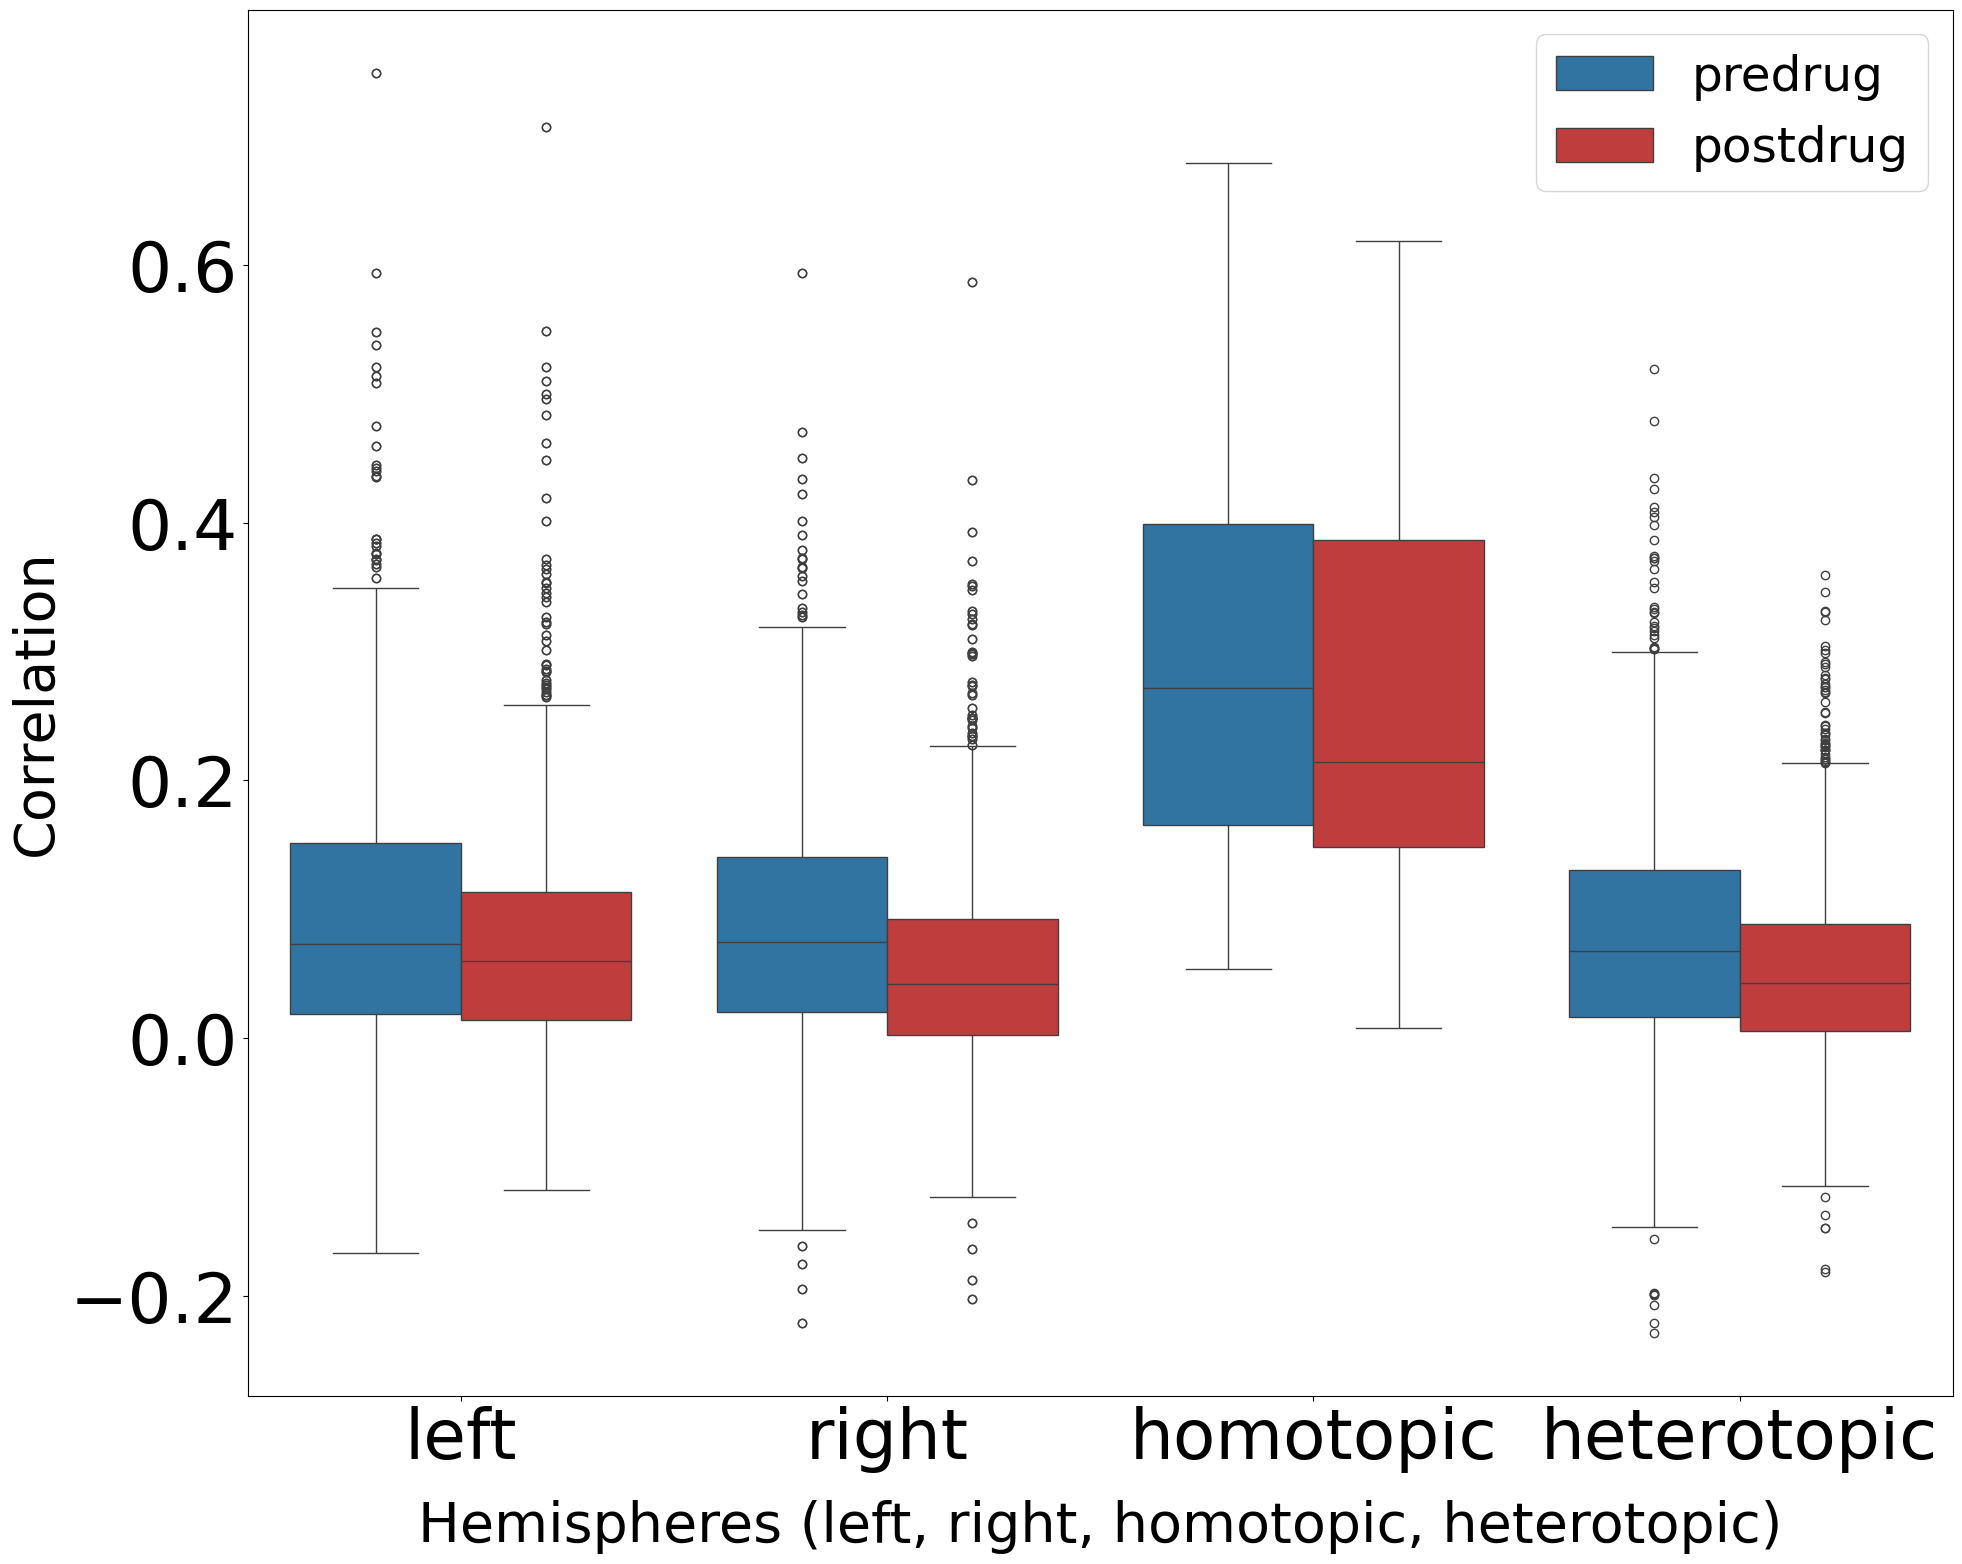

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Ensure output directory exists
os.makedirs("diagrams/boxplot", exist_ok=True)

prefix_number = '002'

subject = 'Linus'
session = 'predrug and postdrug'  

# Load both CSV files
df_predrug = pd.read_csv(f'correlation_files/csv_tables/predrug_sub-{subject}_epi_CHARM_in_NMT_v2.1_sym_05mm_{prefix_number}.csv')
df_postdrug = pd.read_csv(f'correlation_files/csv_tables/postdrug_sub-{subject}_epi_CHARM_in_NMT_v2.1_sym_05mm_{prefix_number}.csv')

df_predrug['Condition'] = 'predrug'
df_postdrug['Condition'] = 'postdrug'

# Combine both DataFrames
df_combined = pd.concat([df_predrug, df_postdrug], ignore_index=True)

df_all_hemispheres = []

# Loop over all connection types
def filter_data(df, hemisphere):
    if hemisphere == 'homotopic':
        df_filtered = df[(df['Variable1'].str.startswith('CL_')) &
                         (df['Variable2'].str.startswith('CR_')) &
                         (df['Variable1'].str[3:] == df['Variable2'].str[3:])]
    elif hemisphere == 'heterotopic':
        df_filtered = df[(df['Variable1'].str.startswith('CL_')) &
                         (df['Variable2'].str.startswith('CR_')) &
                         (df['Variable1'].str[3:] != df['Variable2'].str[3:])]
    elif hemisphere == 'across':
        df_filtered = df[(df['Variable1'].str.startswith('CL_') & df['Variable2'].str.startswith('CR_')) |
                         (df['Variable1'].str.startswith('CR_') & df['Variable2'].str.startswith('CL_'))]
    elif hemisphere == 'left':
        df_filtered = df[(df['Variable1'].str.startswith('CL_')) &
                         (df['Variable2'].str.startswith('CL_')) &
                         (df['Variable1'] != df['Variable2'])]
    elif hemisphere == 'right':
        df_filtered = df[(df['Variable1'].str.startswith('CR_')) &
                         (df['Variable2'].str.startswith('CR_')) &
                         (df['Variable1'] != df['Variable2'])]
    else:
        return pd.DataFrame()  
    
    df_filtered = df_filtered.copy()  # <<< verhindert die Warnung
    df_filtered['Hemisphere'] = hemisphere
    return df_filtered


for hemisphere in ['left', 'right', 'homotopic', 'heterotopic']:
    df_all_hemispheres.append(filter_data(df_combined, hemisphere))

# Combine all hemispheres' data into one DataFrame
df_combined_hemispheres = pd.concat(df_all_hemispheres, ignore_index=True)

# Conduct ANOVA test
model = ols('Correlation ~ C(Condition) * C(Hemisphere)', data=df_combined_hemispheres).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Typ 2 ANOVA table
#print("\nTwo-Way ANOVA Results:")
#print(anova_table)

# Generate the boxplot for all hemispheres
plt.figure(figsize=(22, 18))
farben = {'predrug': '#1f77b4', 'postdrug': '#d62728'}

sns.boxplot(
    data=df_combined_hemispheres,
    x="Hemisphere",
    y="Correlation",
    hue="Condition",
    palette=farben
)
#print(df_combined_hemispheres)
#plt.title(f'Correlations across hemispheres ({session})', fontsize=80, pad=15)
plt.xlabel('Hemispheres (left, right, homotopic, heterotopic)', fontsize=40, labelpad=20)
plt.ylabel('Correlation', fontsize=40)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(fontsize=35)
#plt.savefig(f"diagrams/boxplot/t_Correlation_across_hemispheres_{session}_{subject}_{prefix_number}.png", dpi=300)
#plt.show()


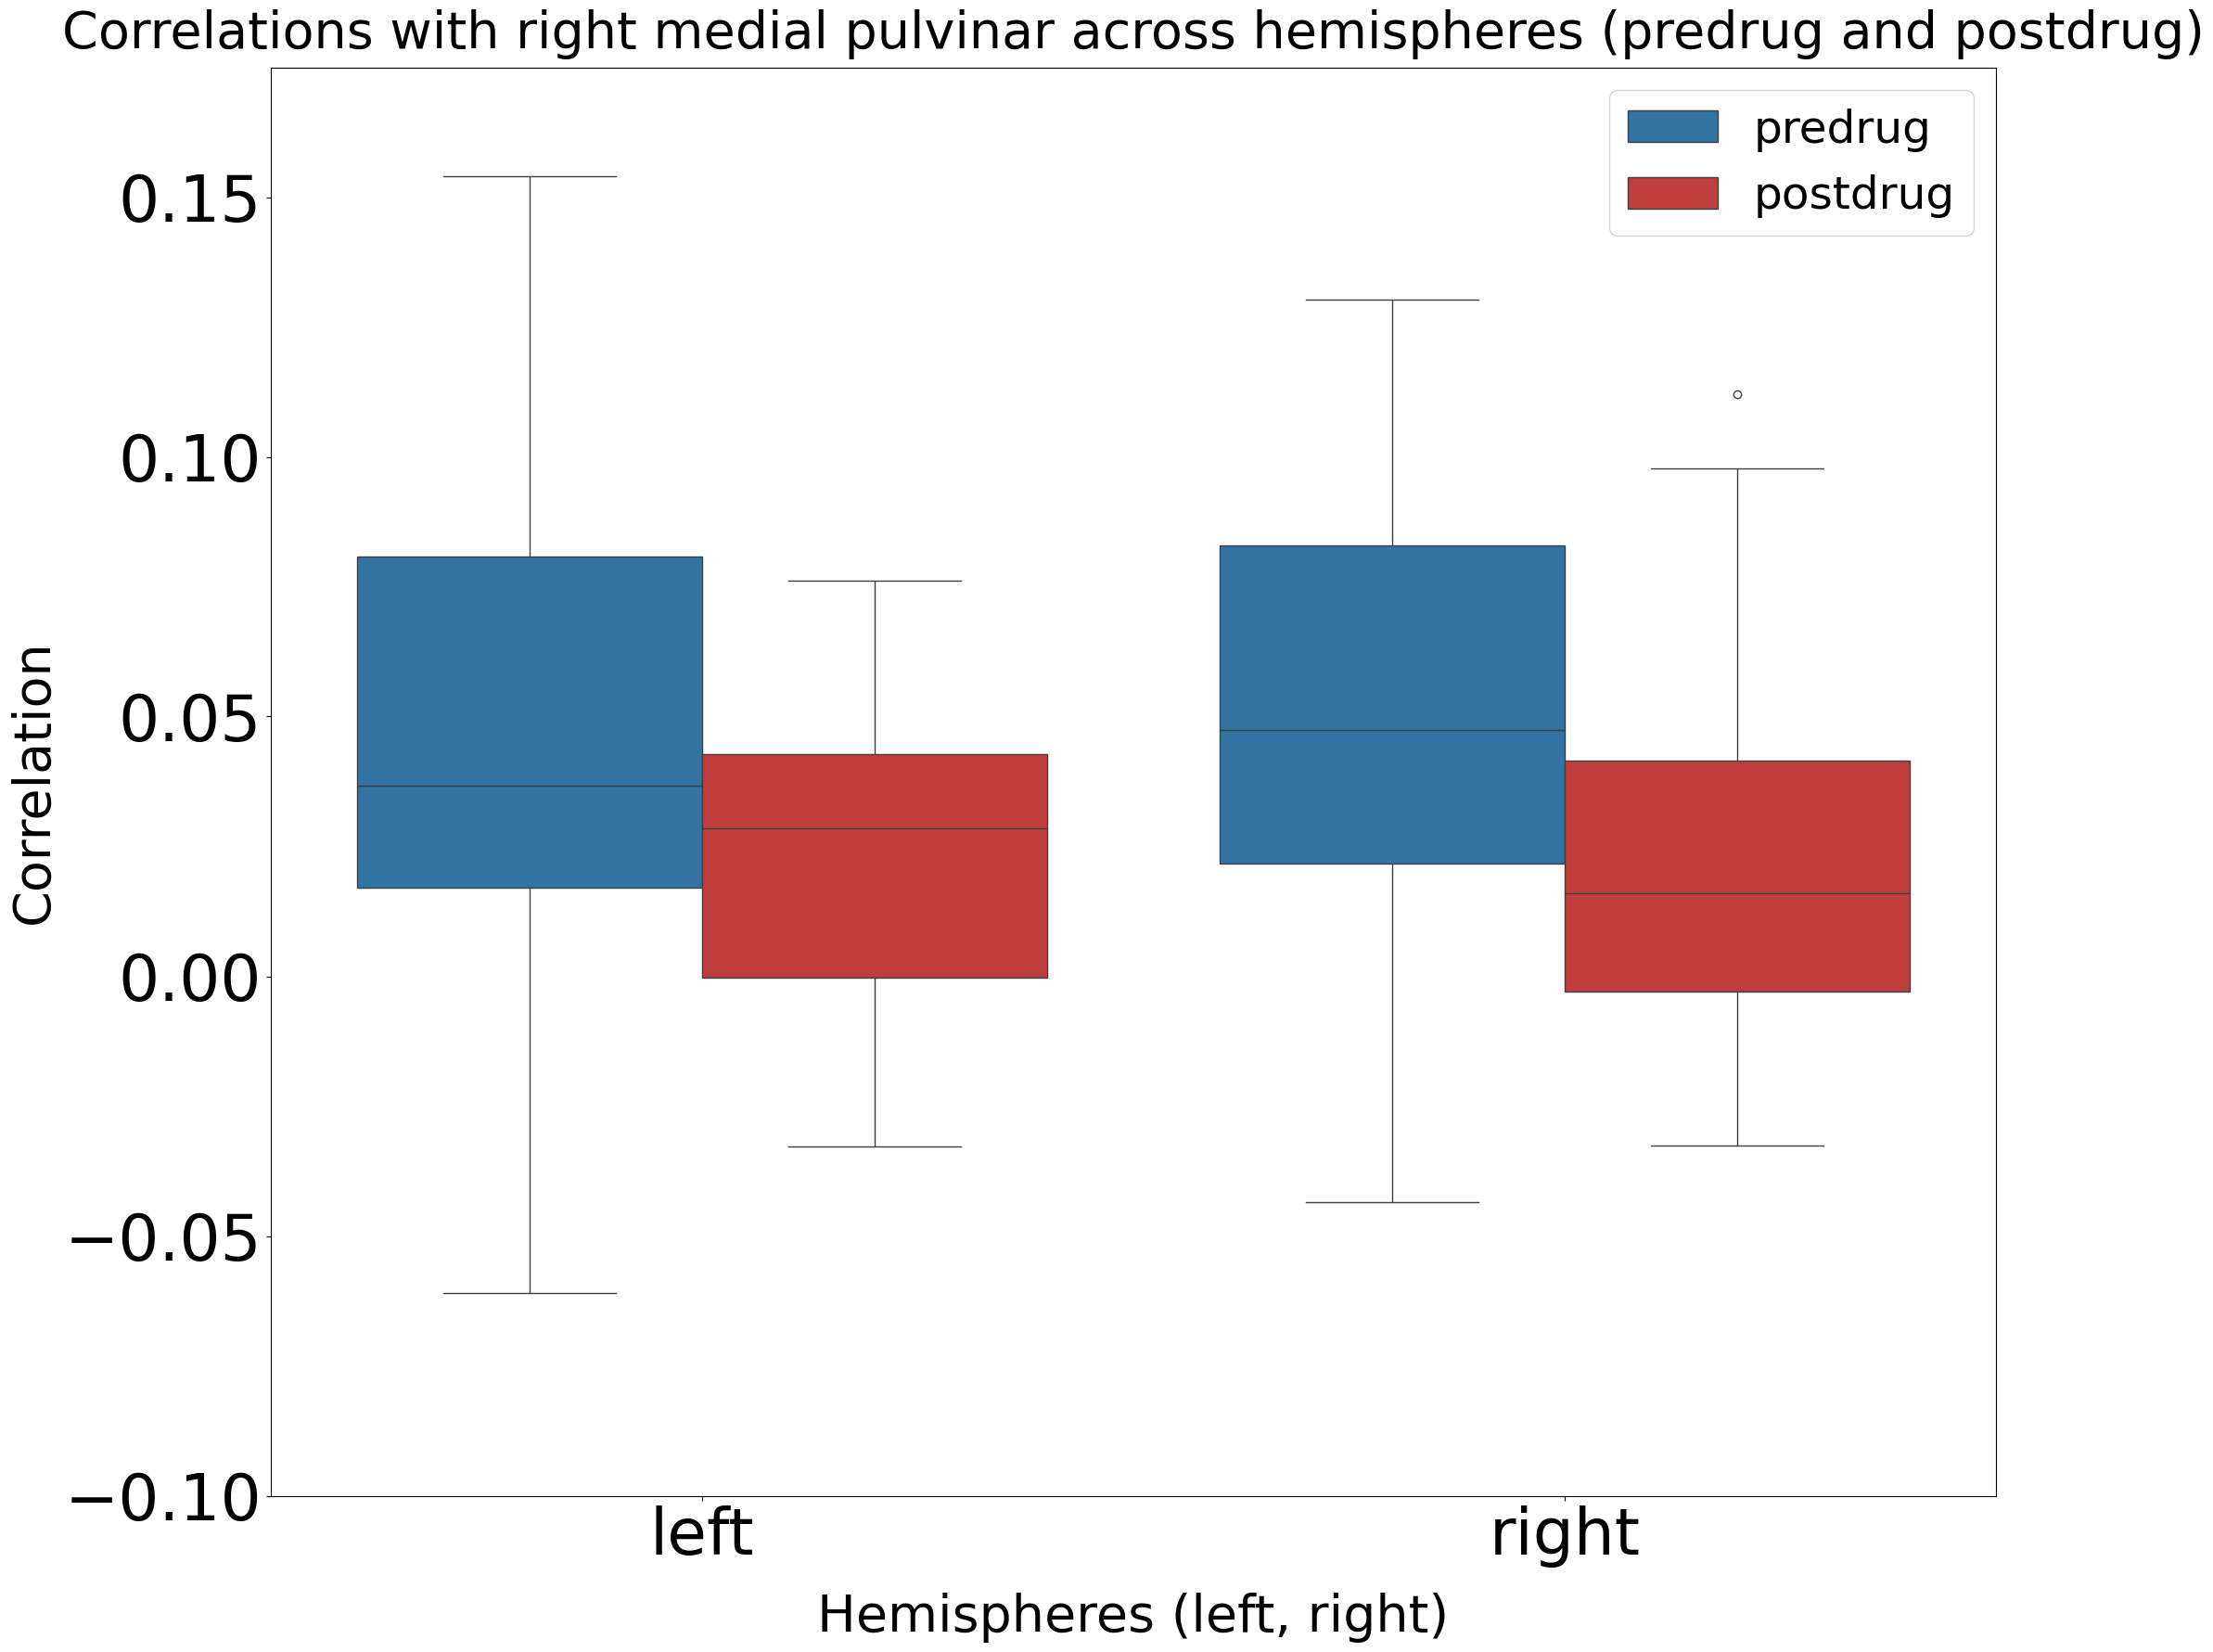

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("diagrams/boxplot", exist_ok=True)

# Please insert with which file you are working from run_30 (prefix number)
prefix_number = '002'

# Please insert with which subject data you are working
subject = 'Linus'
session = 'predrug and postdrug'  

# Load both CSV files
df_predrug = pd.read_csv('correlation_files/csv_tables/with_pul/long_correlation_matrix_Linus_predrug_002.csv')
df_postdrug = pd.read_csv('correlation_files/csv_tables/with_pul/long_correlation_matrix_Linus_postdrug_002.csv')

# Add a condition column to each DataFrame
df_predrug['Condition'] = 'predrug'
df_postdrug['Condition'] = 'postdrug'

# Combine both DataFrames
df_combined = pd.concat([df_predrug, df_postdrug], ignore_index=True)

# Create a list to store the filtered DataFrames for each hemisphere
df_all_hemispheres = []

for hemisphere in ['left', 'right']:  # 'across' entfernt
    prefix1_condition = (df_combined['Variable1'].str.startswith('SR') & 
                         df_combined['Variable1'].str.contains('MPul'))
    
    prefix2 = 'CR_' if hemisphere == 'right' else 'CL_'

    df_filtered = df_combined[(prefix1_condition) & 
                              (df_combined['Variable2'].str.startswith(prefix2)) & 
                              (df_combined['Correlation'] != 1)].copy()
    
    df_filtered.loc[:, 'Hemisphere'] = hemisphere
    
    df_all_hemispheres.append(df_filtered)

# Combine all hemispheres' data into one DataFrame
df_combined_hemispheres = pd.concat(df_all_hemispheres, ignore_index=True)

# Generate the boxplot for all hemispheres
plt.figure(figsize=(24, 20))
farben = {'predrug': '#1f77b4', 'postdrug': '#d62728'}

sns.boxplot(
    data=df_combined_hemispheres,
    x="Hemisphere",
    y="Correlation",
    hue="Condition",
    palette=farben
)

plt.title(f'Correlations with right medial pulvinar across hemispheres ({session})', fontsize=40, pad=15)
plt.xlabel('Hemispheres (left, right)', fontsize=40, labelpad=20)
plt.ylabel('Correlation', fontsize=40)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

plt.legend(fontsize=35, loc='upper right')
plt.ylim(-0.1, 0.175)
plt.savefig(f"diagrams/boxplot/n_Correlation_across_hemispheres_with_right_MPul_{session}_{subject}_{prefix_number}_.png", dpi=300)
plt.show()

# Conduct Two-Way ANOVA
model = ols('Correlation ~ C(Condition) * C(Hemisphere)', data=df_combined_hemispheres).fit()
anova_table = sm.stats.anova_lm(model, typ=2) 
#print("\nTwo-Way ANOVA Results:")
#print(anova_table)

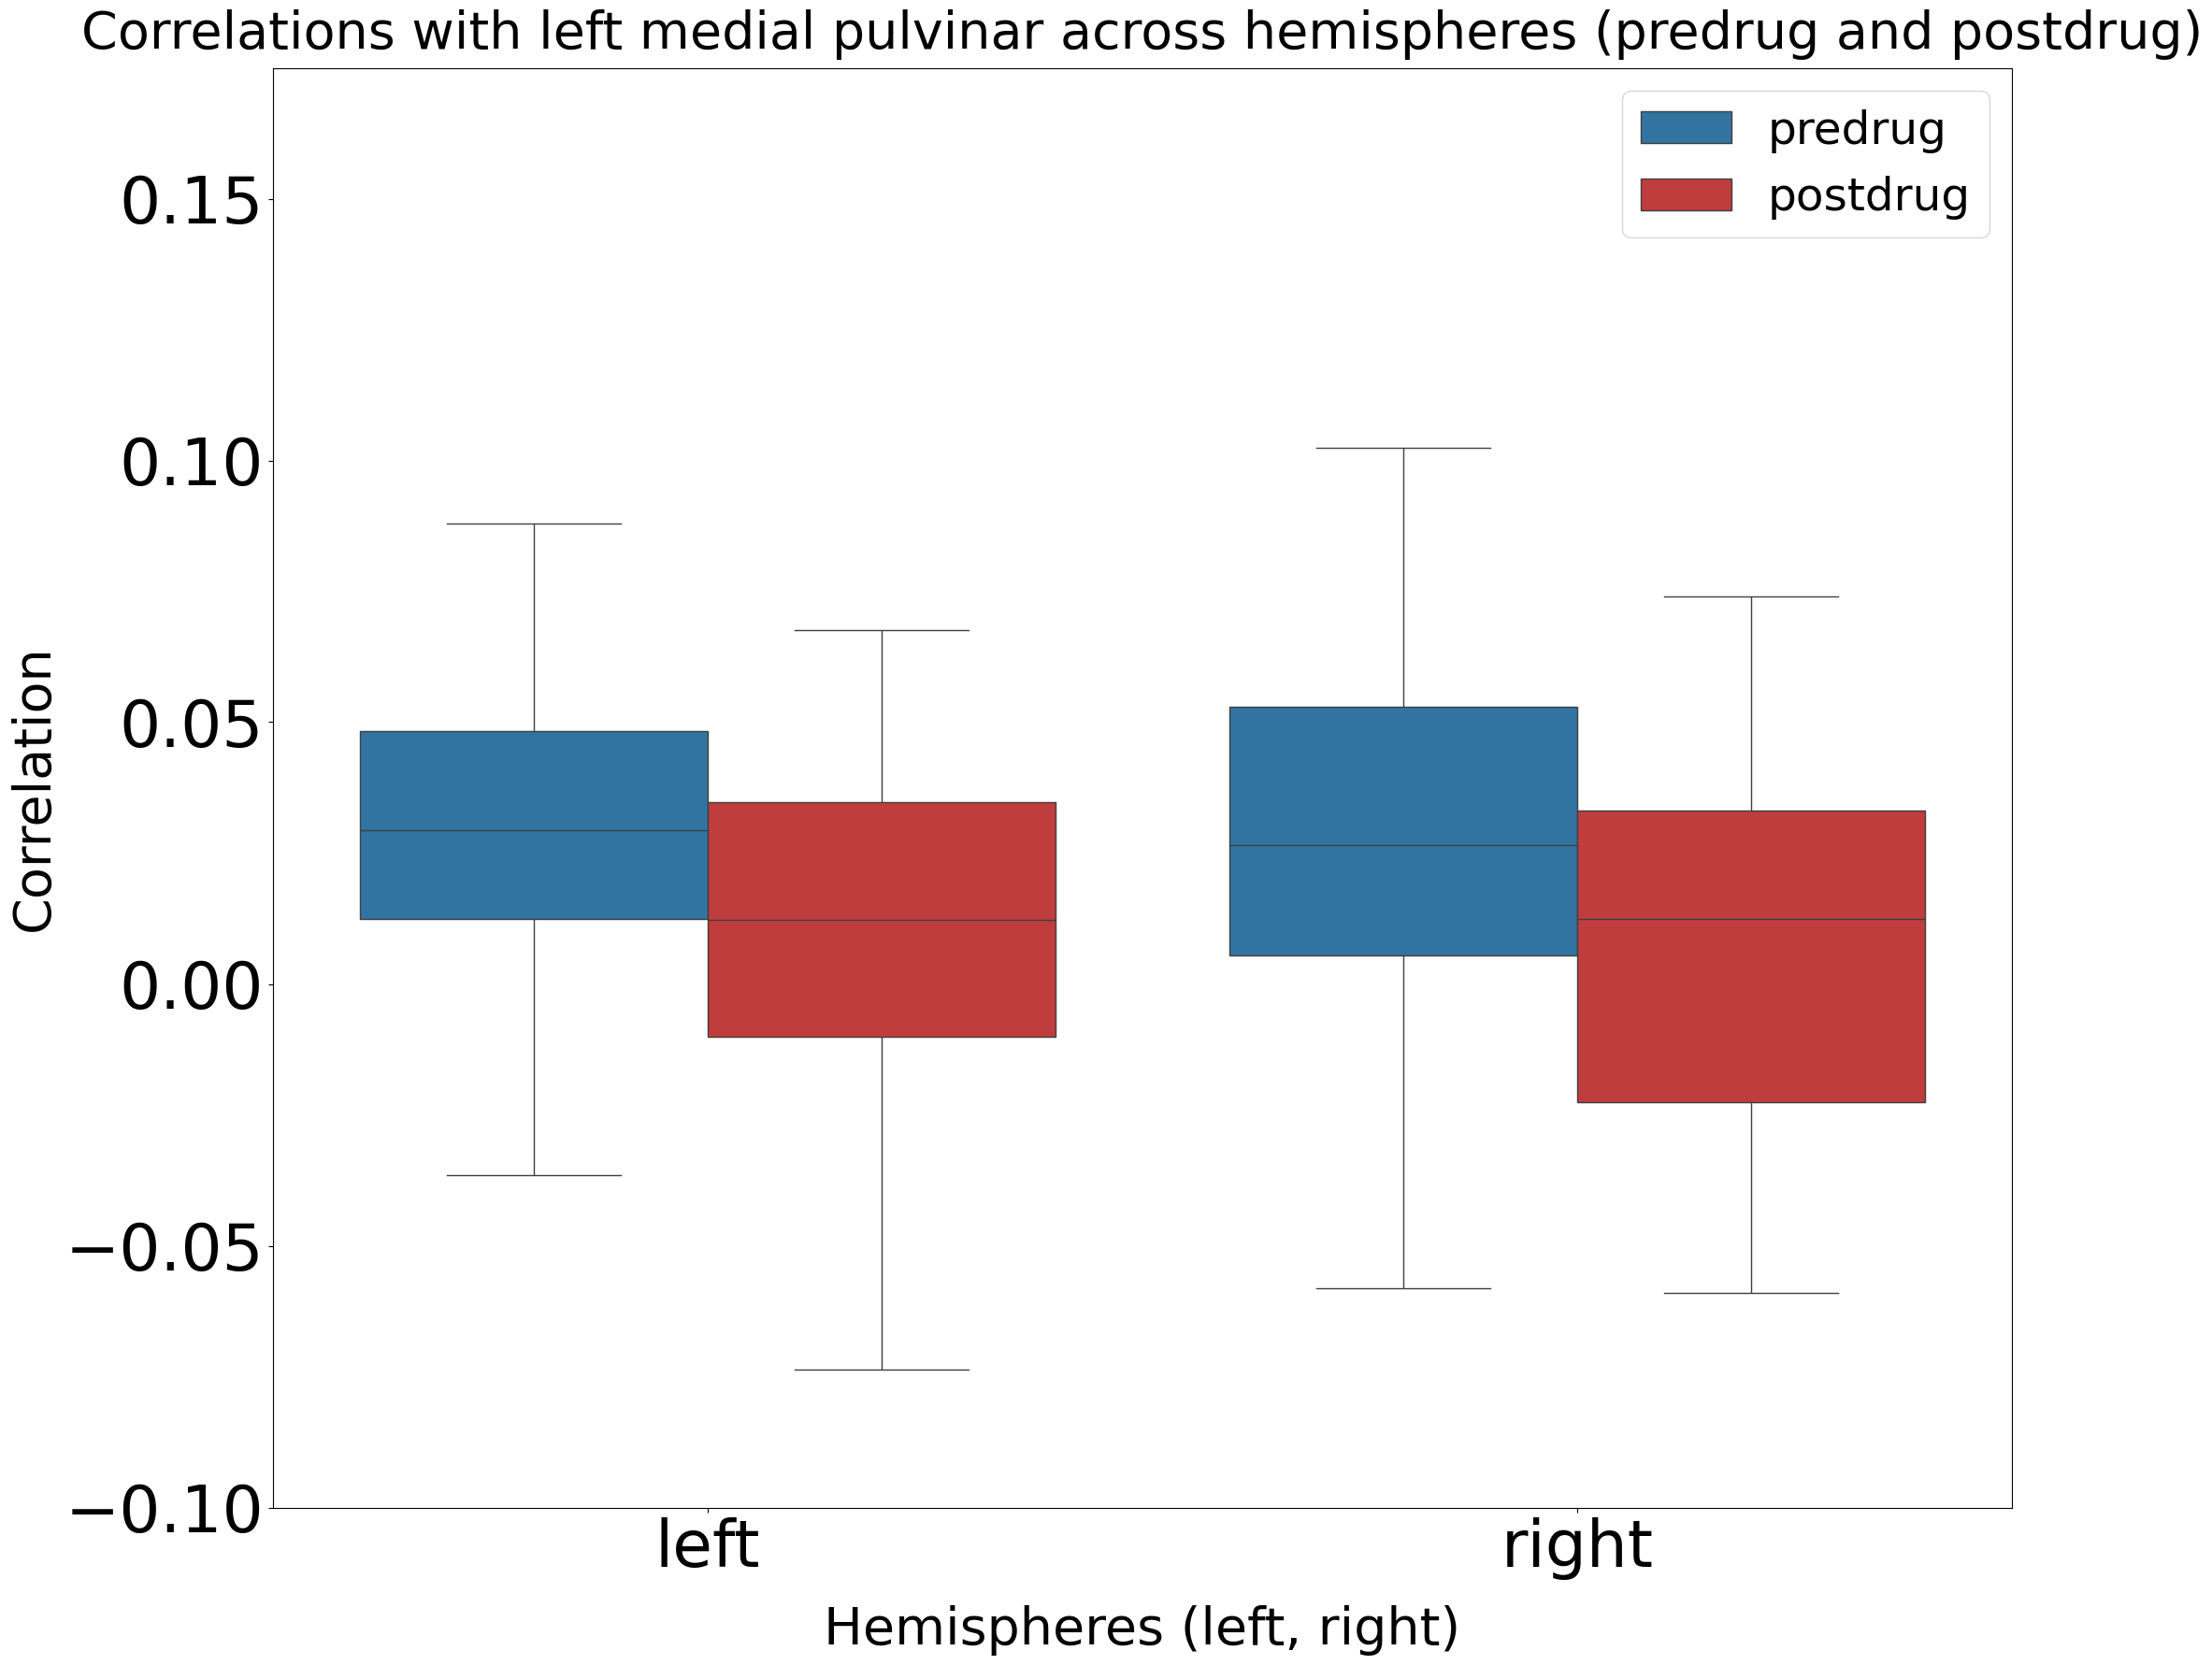

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("diagrams/boxplot", exist_ok=True)

# Please insert with which file you are working from run_30 (prefix number)
prefix_number = '002'

# Please insert with which subject data you are working
subject = 'Linus'
session = 'predrug and postdrug'  

# Load both CSV files
df_predrug = pd.read_csv('correlation_files/csv_tables/with_pul/long_correlation_matrix_Linus_predrug_002.csv')
df_postdrug = pd.read_csv('correlation_files/csv_tables/with_pul/long_correlation_matrix_Linus_postdrug_002.csv')

# Add a condition column to each DataFrame
df_predrug['Condition'] = 'predrug'
df_postdrug['Condition'] = 'postdrug'

# Combine both DataFrames
df_combined = pd.concat([df_predrug, df_postdrug], ignore_index=True)

# Create a list to store the filtered DataFrames for each hemisphere
df_all_hemispheres = []

for hemisphere in ['left', 'right']:  # 'across' entfernt
    prefix1_condition = (df_combined['Variable1'].str.startswith('SL') & 
                         df_combined['Variable1'].str.contains('MPul'))
    
    prefix2 = 'CR_' if hemisphere == 'right' else 'CL_'
    
    df_filtered = df_combined[(prefix1_condition) & 
                              (df_combined['Variable2'].str.startswith(prefix2)) & 
                              (df_combined['Correlation'] != 1)].copy()
    
    df_filtered.loc[:, 'Hemisphere'] = hemisphere
    
    df_all_hemispheres.append(df_filtered)

# Combine all hemispheres' data into one DataFrame
df_combined_hemispheres = pd.concat(df_all_hemispheres, ignore_index=True)

# Generate the boxplot for all hemispheres
plt.figure(figsize=(24, 20))
farben = {'predrug': '#1f77b4', 'postdrug': '#d62728'}

sns.boxplot(
    data=df_combined_hemispheres,
    x="Hemisphere",
    y="Correlation",
    hue="Condition",
    palette=farben
)

plt.title(f'Correlations with left medial pulvinar across hemispheres ({session})', fontsize=40, pad=15)
plt.xlabel('Hemispheres (left, right)', fontsize=40, labelpad=20)
plt.ylabel('Correlation', fontsize=40)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.ylim(-0.1, 0.175)

plt.legend(fontsize=35)
plt.savefig(f"diagrams/boxplot/n_Correlation_across_hemispheres_with_left_MPul_{session}_{subject}_{prefix_number}_.png", dpi=300)
plt.show()
anova_results = {}
for hemisphere in ['left', 'right']:
    df_hemisphere = df_combined_hemispheres[df_combined_hemispheres['Hemisphere'] == hemisphere]
    
    if not df_hemisphere.empty:
        model = ols('Correlation ~ C(Condition)', data=df_hemisphere).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_results[hemisphere] = anova_table
        #print(f"ANOVA Ergebnisse für {hemisphere} Hemisphäre:")
        #print(anova_table)
        #print("\n" + "="*50 + "\n")
# Conduct Two-Way ANOVA
model = ols('Correlation ~ C(Condition) * C(Hemisphere)', data=df_combined_hemispheres).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  
#print("\nTwo-Way ANOVA Results:")
#print(anova_table)